In [29]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



In [30]:
# Combine the data into a single dataset

merged_data_df = ride_data_df.merge(city_data_df, how='left', on='city').dropna(how='any')
# Display the data table for preview
merged_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
#group rides by city and type
grouped_df = merged_data_df.groupby(['city', 'type'])
#grouped_df.city.count()

#find number of rides by type, ride count, number of drivers
rrl_df = merged_data_df[merged_data_df['type'] == 'Rural'].groupby('city')
rrl_rides = rrl_df['ride_id'].count()
rrl_avg_fare = rrl_df['fare'].mean()
rrl_drivers = rrl_df['driver_count'].mean()
sub_df = merged_data_df[merged_data_df['type'] == 'Suburban'].groupby('city')
sub_rides = sub_df['ride_id'].count()
sub_avg_fare = sub_df['fare'].mean()
sub_drivers = sub_df['driver_count'].mean()
urb_df = merged_data_df[merged_data_df['type'] == 'Urban'].groupby('city')
urb_rides = urb_df['ride_id'].count()
urb_avg_fare = urb_df['fare'].mean()
urb_drivers = urb_df['driver_count'].mean()



## Bubble Plot of Ride Sharing Data

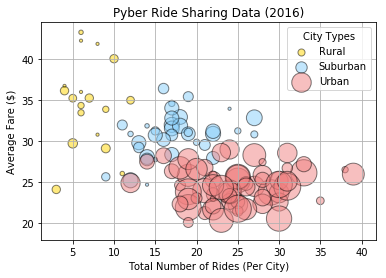

In [32]:

# Build the scatter plots for each city types
#plot Rural data points
plt.scatter(x=rrl_rides, 
            y=rrl_avg_fare, 
            s=rrl_drivers*10,
            alpha = .5,
           edgecolor='black',
           c='gold')
#plot Suburb data points
plt.scatter(x=sub_rides,
           y=sub_avg_fare,
           s=sub_drivers*10,
           alpha = .5,
           edgecolor='black',
           c='lightskyblue')
#plot Urban data points
plt.scatter(x=urb_rides,
           y=urb_avg_fare,
           s=urb_drivers*10,
           alpha = .5,
           edgecolor='black',
           c='lightcoral')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
plt.legend(title='City Types', labels=['Rural','Suburban','Urban'])
# Save Figure
plt.savefig('./2016PyberRideSharingData.png')
plt.show()

In [33]:
# Show plot
plt.show()

## Total Fares by City Type

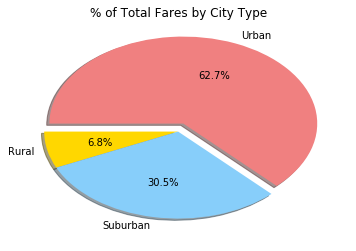

In [34]:
grouped_df = merged_data_df.groupby('type')
# Calculate Type Percents
total_fares = merged_data_df['fare'].sum()
totals = grouped_df['fare'].sum()
pct = 100 * totals / total_fares

# Build Pie Chart
plt.pie(pct,
       explode = (0, 0, 0.1),
       colors = ("gold",'lightskyblue', 'lightcoral'),
       startangle = 180,
       labels=['Rural','Suburban','Urban'],
       shadow=True,
       autopct = "%1.1f%%")
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('./pie_percent_fares')


In [35]:
# Show Figure
plt.show()

## Total Rides by City Type

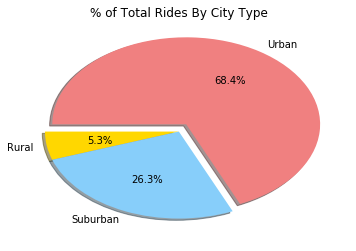

In [36]:
# Calculate Ride Percents
total_rides = merged_data_df['ride_id'].count()
#2375
rides = grouped_df['ride_id'].count()
#r = 125, s=625, u=1625
pct = 100 * rides / total_fares


#print(rides)
#print(pct)

# Build Pie Chart
plt.pie(pct, 
        explode = (0, 0, 0.1),
       colors = ("gold",'lightskyblue', 'lightcoral'),
       startangle = 180,
       labels=['Rural','Suburban','Urban'],
       shadow=True,
       autopct = "%1.1f%%")
plt.title('% of Total Rides By City Type')

# Save Figure
plt.savefig('./pie_percent_rides.png')

In [37]:
# Show Figure
plt.show()

## Total Drivers by City Type

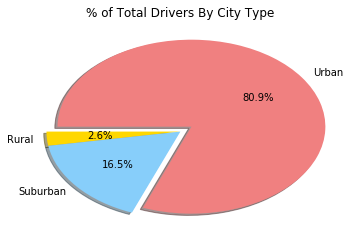

In [38]:
# Calculate Driver Percents

rural_driver = merged_data_df[merged_data_df['type'] == 'Rural'].drop_duplicates(subset='city').driver_count.sum()
sub_driver = merged_data_df[merged_data_df['type'] == 'Suburban'].drop_duplicates(subset='city').driver_count.sum()
urb_driver = merged_data_df[merged_data_df['type'] == 'Urban'].drop_duplicates(subset='city').driver_count.sum()
driver = [rural_driver, sub_driver, urb_driver]
total_driver = sum(driver)

for i in range(len(driver)):
    driver[i] *= 100
    driver[i] /= total_driver

# Build Pie Charts
plt.pie(driver, 
        explode = (0, 0, 0.1),
        colors = ("gold",'lightskyblue', 'lightcoral'),
        startangle = 180,
        labels=['Rural','Suburban','Urban'],
        shadow=True,
        autopct = "%1.1f%%")
plt.title('% of Total Drivers By City Type')

# Save Figure
plt.savefig('./pie_percent_drivers.png')

In [39]:
# Show Figure
plt.show()